# Data Preprocessing air quality 

In [1]:
# import packages
import pandas as pd
import numpy as np
import warnings

import seaborn as sns
import matplotlib.pyplot as plt

from scipy.stats import boxcox
warnings.filterwarnings('ignore')


In [2]:
# import data
data = pd.read_csv('data/data_51.csv', index_col=[0])
data.head(2)

,ID,location,temp,precip,rel_humidity,wind_dir,wind_spd,atmos_press,target,max_temp,...,var_wind_spd,median_wind_spd,ptp_wind_spd,max_atmos_press,min_atmos_press,mean_atmos_press,std_atmos_press,var_atmos_press,median_atmos_press,ptp_atmos_press
0,ID_train_0,C,"[26.90909091, 27.20833333, 26.18333333, 24.7, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.5108181820000001, 0.535416667, 0.6145, 0.63...","[272.90275160000004, 104.565241, 167.1772247, ...","[0.800909091, 1.073333333, 1.5175, 1.4625, 0.5...","[87.77727273, 87.6525, 87.61416667, 87.6375, 8...",45.126304,27.208333,...,0.155268,0.666250,1.355000,87.871667,87.614167,87.752434,0.070374,0.004952,87.762083,0.257500
1,ID_train_1,D,"[22.53333333, 21.71666667, 20.83333333, 20.983...","[0.102, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.034, 0...","[0.744583333, 0.808083333, 0.911166667, 0.9163...","[281.6643101, 89.15629262, 81.96853891, 291.01...","[2.3775, 1.126666667, 0.700833333, 0.341666667...","[90.32, 90.3775, 90.44083333, 90.4725, 90.4541...",79.131702,33.616667,...,0.290736,0.744167,2.760833,90.725000,90.056667,90.429924,0.156000,0.024336,90.429167,0.668333


In [3]:
# name of columns
features=["temp","precip","rel_humidity","wind_dir","wind_spd","atmos_press"]
max_features = ["max_" + str(feat) for feat in features]
min_features = ["min_" + str(feat) for feat in features]
mean_features = ["mean_" + str(feat) for feat in features]
std_features = ["std_" + str(feat) for feat in features]
var_features = ["vat_" + str(feat) for feat in features]
median_features = ["median_" + str(feat) for feat in features]
ptp_features = ["ptp_" + str(feat) for feat in features]


<AxesSubplot:xlabel='target', ylabel='Count'>

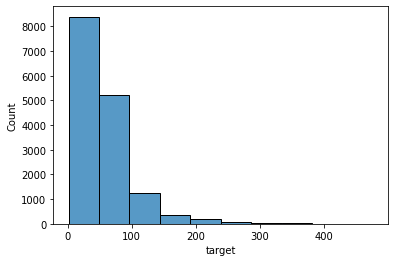

In [4]:
# overview of the target 
sns.histplot(data.target, bins=10)  # TODO bins passend zu der Klassifizierung



In [5]:
#data['target'], lmbda=boxcox(data['target'], lmbda=None)
data['target_log'] = data['target'].apply(np.log1p)

<AxesSubplot:xlabel='target_log', ylabel='Count'>

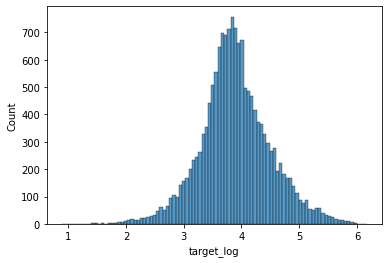

In [6]:
sns.histplot(data.target_log)


In [7]:
# null values
def print_null(df):
    total = df.isnull().sum().sort_values(ascending=False)
    total = total[df.isnull().sum().sort_values(ascending=False) != 0]
    percent = total /df.shape[0]*100
    percent = percent[df.isnull().sum().sort_values(ascending=False) != 0]
    concat = pd.concat([total, percent])
    print (concat)

    
print_null(data.drop(features, axis=1))

target_log    5035.000000
target        5035.000000
target_log      24.472635
target          24.472635
dtype: float64


In [8]:
#sns.pairplot(data[mean_features])

#### EDA on precipitation

In [9]:
# EDA precipitation:
precip_stats = pd.concat([data.max_precip, 
                        data.min_precip, 
                        data.mean_precip, 
                        data.std_precip, 
                        data.var_precip, 
                        data.median_precip,  # all 0,0
                        data.ptp_precip],
                        axis=1)
precip_stats['r_std_precip'] = precip_stats['std_precip'] / precip_stats['mean_precip'] *100
#data['sum_precip'] = data['precip'].apply(lambda x: np.sum(x))

<AxesSubplot:xlabel='mean_precip', ylabel='target'>

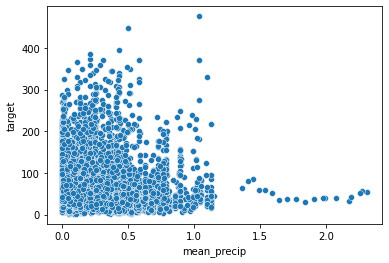

In [10]:
sns.scatterplot(data=data, x='mean_precip', y='target')

In [11]:
#sns.scatterplot(data=data, x='sum_precip', y='target')

In [12]:
data.median_precip.unique()

array([0.])

In [13]:
data[['precip', 'std_precip','mean_precip']].head(2)



,precip,std_precip,mean_precip
0,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0.000000,0.000000
1,"[0.102, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.034, 0...",0.051706,0.007025


In [14]:
precip_stats.median_precip.unique() #median values are all 0, why?

array([0.])

<AxesSubplot:xlabel='mean_precip', ylabel='Count'>

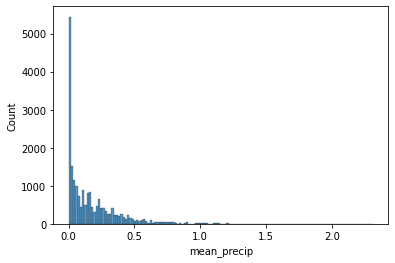

In [15]:
sns.histplot(precip_stats.mean_precip) # a lot of mean values == 0, when it doesnt rain

In [16]:
"""def log1p(x):
    return np.log1p(x)

precip_stats['log_mean_precip'] = precip_stats['mean_precip'].apply(lambda x: log1p(X) for X in precip_stats.mean_precip )"""

"def log1p(x):\n    return np.log1p(x)\n\nprecip_stats['log_mean_precip'] = precip_stats['mean_precip'].apply(lambda x: log1p(X) for X in precip_stats.mean_precip )"

In [17]:
# relative Standard deviation of the precipitation
#sns.histplot(precip_stats.r_std_precip)

In [18]:
precip_stats.r_std_precip.sort_values(ascending=False)[:3]

8729    1095.445115
4436    1095.445115
534     1095.445115
Name: r_std_precip, dtype: float64

In [19]:
precip_stats.values[3]

array([ 25.787     ,   0.        ,   1.12727273,   3.73988635,
        13.98674993,   0.        ,  25.787     , 331.76411197])

In [20]:

#np.std(data.precip[90])/
#np.mean(data.precip[3])#*100

The relative standard deviation is less than 15%, it should be ok

#### EDA on humidity 

In [21]:
# EDA humidity:
rel_hum_stats = pd.concat([data.max_rel_humidity, 
                        data.min_rel_humidity, 
                        data.mean_rel_humidity, 
                        data.std_rel_humidity, 
                        data.var_rel_humidity, 
                        data.median_rel_humidity,  # all 0
                        data.ptp_rel_humidity],
                        axis=1)
rel_hum_stats['r_std_rel_humidity'] = rel_hum_stats['std_rel_humidity'] / rel_hum_stats['mean_rel_humidity'] * 100


<AxesSubplot:xlabel='mean_rel_humidity', ylabel='Count'>

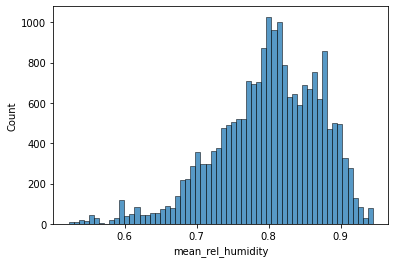

In [22]:
sns.histplot(rel_hum_stats.mean_rel_humidity) # a lot of mean values == 0, when it doesnt rain

<AxesSubplot:xlabel='r_std_rel_humidity', ylabel='Count'>

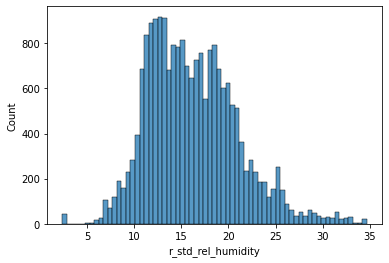

In [23]:
# relative Standard deviation of the precipitation
sns.histplot(rel_hum_stats.r_std_rel_humidity)

### EDA on wind speed

In [24]:
# EDA wind speed on metres per second:
wind_spd_stats = pd.concat([data.max_wind_spd, 
                        data.min_wind_spd, 
                        data.mean_wind_spd, 
                        data.std_wind_spd, 
                        data.var_wind_spd, 
                        data.median_wind_spd,  # all 0
                        data.ptp_wind_spd],
                        axis=1)
wind_spd_stats['r_std_wind_spd'] = wind_spd_stats['std_wind_spd'] / wind_spd_stats['mean_wind_spd'] * 100

<AxesSubplot:xlabel='mean_wind_spd', ylabel='Count'>

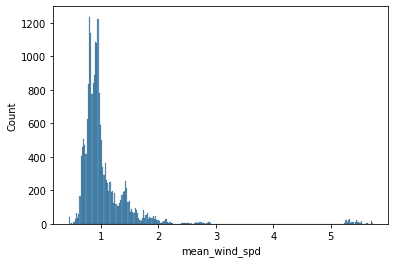

In [25]:
sns.histplot(wind_spd_stats.mean_wind_spd) # 5m/2 means Beafourt 3 -> leichte brise

<AxesSubplot:xlabel='r_std_wind_spd', ylabel='Count'>

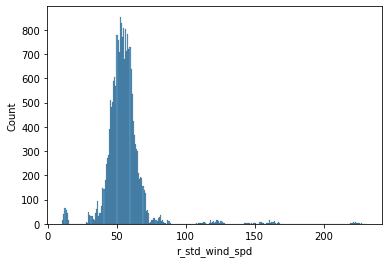

In [26]:
sns.histplot(wind_spd_stats.r_std_wind_spd)

#### atmos_press: mean atmospheric pressure(atm)*

[(87.5, 91.0)]

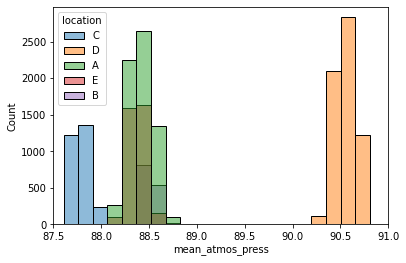

In [27]:
p = sns.histplot(data=data , x = 'mean_atmos_press', hue='location')
p.set(xlim=(87.5, 91))


[(87.5, 91.0)]

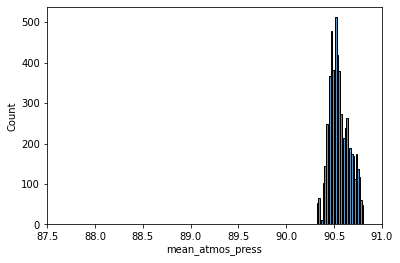

In [28]:
locations = ['A', 'B', 'C', 'D', 'E']

a = data[(data['location']=='D')]
ad= sns.histplot(a.mean_atmos_press)
ad.set(xlim=(87.5, 91))

mean_atmos_press depends on the location. 
?needs to level?

In [29]:
del data

# Feature engineering

on data process

In [30]:
data = pd.read_csv('data/data_15_mean.csv', index_col=[0])


### Log(1+x) Tranform target

In [31]:
"""train_z['log_target'] = train_z['target'].apply(np.log1p)"""

"train_z['log_target'] = train_z['target'].apply(np.log1p)"

### One Hot encoder location

In [32]:
from sklearn.preprocessing import LabelEncoder
enc = LabelEncoder()
enc.fit(data["location"])
data["location"]=enc.transform(data["location"])


In [33]:
enc.fit(data["location"])
data["location"]=enc.transform(data["location"])

In [34]:
data.shape

(20574, 15)

In [35]:
data.head(2)

,ID,location,temp,precip,rel_humidity,wind_dir,wind_spd,atmos_press,target,mean_temp,mean_precip,mean_rel_humidity,mean_wind_dir,mean_wind_spd,mean_atmos_press
0,ID_train_0,2,"[26.90909091, 27.20833333, 26.18333333, 24.7, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.5108181820000001, 0.535416667, 0.6145, 0.63...","[272.90275160000004, 104.565241, 167.1772247, ...","[0.800909091, 1.073333333, 1.5175, 1.4625, 0.5...","[87.77727273, 87.6525, 87.61416667, 87.6375, 8...",45.126304,22.299527,0.000000,0.758530,209.574655,0.677348,87.752434
1,ID_train_1,3,"[22.53333333, 21.71666667, 20.83333333, 20.983...","[0.102, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.034, 0...","[0.744583333, 0.808083333, 0.911166667, 0.9163...","[281.6643101, 89.15629262, 81.96853891, 291.01...","[2.3775, 1.126666667, 0.700833333, 0.341666667...","[90.32, 90.3775, 90.44083333, 90.4725, 90.4541...",79.131702,24.679063,0.007025,0.758058,177.109855,0.899208,90.429924


### original feature drop

in Zindi database is done

In [36]:
features=["temp","precip","rel_humidity","wind_dir","wind_spd","atmos_press", 'ID']
data= data.drop(features, axis=1)
data.head(2)

,location,target,mean_temp,mean_precip,mean_rel_humidity,mean_wind_dir,mean_wind_spd,mean_atmos_press
0,2,45.126304,22.299527,0.000000,0.758530,209.574655,0.677348,87.752434
1,3,79.131702,24.679063,0.007025,0.758058,177.109855,0.899208,90.429924


In [37]:
data.shape

(20574, 8)

### export as csv


In [38]:
data.to_csv('data/data_8.csv')
#test_z.to_csv('data/test_ours.csv')

## Basis Model

the prediction gives the mean value of the target

In [39]:
# select only Location D
data = data[(data['location']== 4)]
data.shape
#fillna
data = data.fillna(data.mean())

In [40]:
data.head()

,location,target,mean_temp,mean_precip,mean_rel_humidity,mean_wind_dir,mean_wind_spd,mean_atmos_press
5,4,17.005000,22.581950,0.572736,0.795031,168.296246,1.133221,88.437645
11,4,45.024500,21.315771,0.062000,0.831841,243.946644,0.996488,88.439917
20,4,32.363333,25.333747,0.001545,0.699638,182.435273,1.380289,88.229222
29,4,45.775714,23.653656,0.366950,0.763010,193.489922,1.510851,88.311949
30,4,41.390455,22.079760,0.075133,0.716946,226.400482,1.742356,88.397523


In [41]:
from sklearn.metrics import mean_squared_error

In [42]:
def rmse(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

In [43]:
def error_analysis(y_test, y_pred_test):
    """Generated true vs. predicted values and residual scatter plot for models

    Args:
        y_test (array): true values for y_test
        y_pred_test (array): predicted values of model for y_test
    """     
    # Calculate residuals
    residuals = y_test - y_pred_test
    
    # Plot real vs. predicted values 
    fig, ax = plt.subplots(1,2, figsize=(15, 5))
    plt.subplots_adjust(right=1)
    plt.suptitle('Error Analysis')
    
    ax[0].scatter(y_pred_test, y_test, color="#FF5A36", alpha=0.7)
    ax[0].plot([-400, 350], [-400, 350], color="#193251")
    ax[0].set_title("True vs. predicted values", fontsize=16)
    ax[0].set_xlabel("predicted values")
    ax[0].set_ylabel("true values")
    #ax[0].set_xlim((y_pred_test.min()-10), (y_pred_test.max()+10))
    ax[0].set_ylim((y_test.min()-40), (y_test.max()+40))
    
    ax[1].scatter(y_pred_test, residuals, color="#FF5A36", alpha=0.7)
    ax[1].plot([-400, 350], [0,0], color="#193251")
    ax[1].set_title("Residual Scatter Plot", fontsize=16)
    ax[1].set_xlabel("predicted values")
    ax[1].set_ylabel("residuals")
    #ax[1].set_xlim((y_pred_test.min()-10), (y_pred_test.max()+10))
    #ax[1].set_ylim((residuals.min()-10), (residuals.max()+10));

In [44]:
# with zindi data:

# mean target
mean_target_zindi = data.target.mean() # 58.24
# prediction are all the mean of the target 58.24
y_target_zindi = [mean_target_zindi for x in range (data.target.shape[0])]

# with our data : 

"""# transform all target values to log: 
y_target_log = [np.log1p(x) for x in y_target_zindi]
# mean value for log_target values
mean_target_log = np.mean(y_target_log) # 4.081
# prediction are all the mean of the log_target 
y_target_log = [mean_target_log for x in range (data.target.shape[0])]
"""

rmse_zindi = rmse(data.target, y_target_zindi)
#rmse_our =   rmse(data.log_target, y_target_log)



print('Zindi: ')
print (f'Mean Target : {mean_target_zindi:.2f} \t RMSE: {rmse_zindi:.2f} \t NRMSE: {rmse_zindi/mean_target_zindi:.2f}')
print('Our (log_transform)')
#print (f'Mean Target: {mean_target_log:.2f} \t RMSE: {rmse_our:.2f} \t NRMSE:{rmse_our/mean_target_log:.2f}') #54.354144


Zindi: 
Mean Target : 37.80 	 RMSE: 20.54 	 NRMSE: 0.54
Our (log_transform)


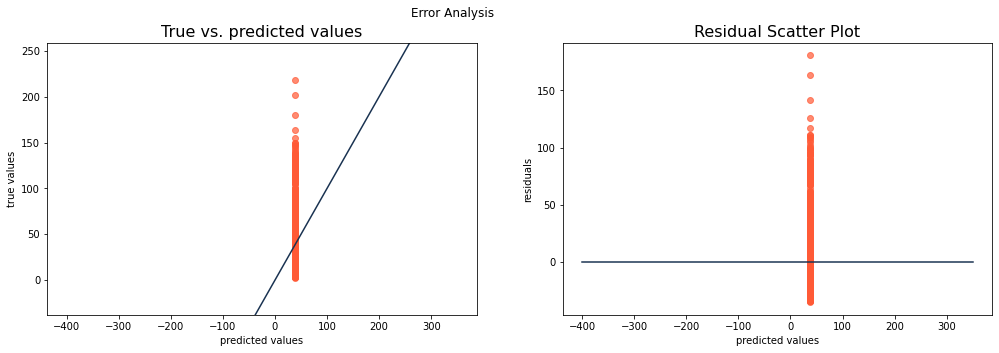

In [45]:
# error analysis 
error_analysis(data.target, y_target_zindi)           

In [46]:
data["Bi_airquality"] = pd.cut(data["target"], bins =[0, 35, 475.82] , labels=["good", "bad"])

In [47]:
 data["trafic_airquality"]=pd.cut(data["target"],bins=[ 0, 35, 150, 476 ], labels=["green", "yellow", "red"])

In [48]:
data["6fold_airquality"]=pd.cut(data["target"],bins=[ 0, 12, 35, 55, 150, 250, 476 ], labels=["Good", "Moderate", "low unhealthy","med unhealthy","very unhealthy","hazardous"])

In [49]:
data.head()

,location,target,mean_temp,mean_precip,mean_rel_humidity,mean_wind_dir,mean_wind_spd,mean_atmos_press,Bi_airquality,trafic_airquality,6fold_airquality
5,4,17.005000,22.581950,0.572736,0.795031,168.296246,1.133221,88.437645,good,green,Moderate
11,4,45.024500,21.315771,0.062000,0.831841,243.946644,0.996488,88.439917,bad,yellow,low unhealthy
20,4,32.363333,25.333747,0.001545,0.699638,182.435273,1.380289,88.229222,good,green,Moderate
29,4,45.775714,23.653656,0.366950,0.763010,193.489922,1.510851,88.311949,bad,yellow,low unhealthy
30,4,41.390455,22.079760,0.075133,0.716946,226.400482,1.742356,88.397523,bad,yellow,low unhealthy


In [50]:
#data.to_csv("./data/data_classification.csv")